# The Sinc and Rectangular Functions and Its Frequency Representations

In this notebook, we explore the relationship between a rectangular pulse in the time domain and the sinc function in the frequency domain, as well as the converse. This relationship is fundamental in signal processing and Fourier analysis.

We'll visualize:

- A time-domain rectangular pulse and its frequency spectrum (which resembles a sinc function).
- A time-domain sinc function and its spectrum (which resembles a rectangular function).

These are examples of **Fourier transform duality**:

$$
\text{If } x(t) \longleftrightarrow X(f) \quad \text{then } X(t) \longleftrightarrow x(-f)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Sampling parameters
fs = 1000  # Sampling frequency (Hz)
dt = 1 / fs
t = np.arange(-5, 5, dt)  # Time vector (s)

# Pulse width
tao = 1
half_tao = tao / 2

# Rectangular pulse: x(t) = 1 for |t| < tao/2
pulse = (np.abs(t) < half_tao).astype(float)

# Sinc function: sin(pi*t)/(pi*t)
sinc_func = np.sinc(t)  # NumPy uses normalized sinc: sin(pi*t)/(pi*t)

nx = len(pulse)
L = tao * fs  # Normalization factor (area under pulse)


## Fourier Transform of a Rectangular Pulse

A rectangular pulse of duration $ \tau $ centered at $ t = 0 $:

$$
x(t) = 
\begin{cases}
1 & \text{if } |t| < \frac{\tau}{2} \\
0 & \text{otherwise}
\end{cases}
$$

Its continuous-time Fourier transform is:

$$
X(f) = \tau \cdot \text{sinc}(\tau f)
$$

where the sinc function is defined as:

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$

The inverse is also true: the Fourier transform of a sinc function is a rectangular function.


In [3]:
# FFT parameters
nfft = int(2 ** np.ceil(np.log2(nx)))  # Zero-padding to next power of 2
df = fs / nfft
f = np.fft.fftshift(np.fft.fftfreq(nfft, d=dt))  # Two-sided frequency axis

# Fourier transforms
pulseFFT = np.fft.fft(pulse, nfft) / L
sincFFT = np.fft.fft(sinc_func, nfft) / L

# Shift for plotting
pulseFFT_mag = np.abs(np.fft.fftshift(pulseFFT))
sincFFT_mag = np.abs(np.fft.fftshift(sincFFT))


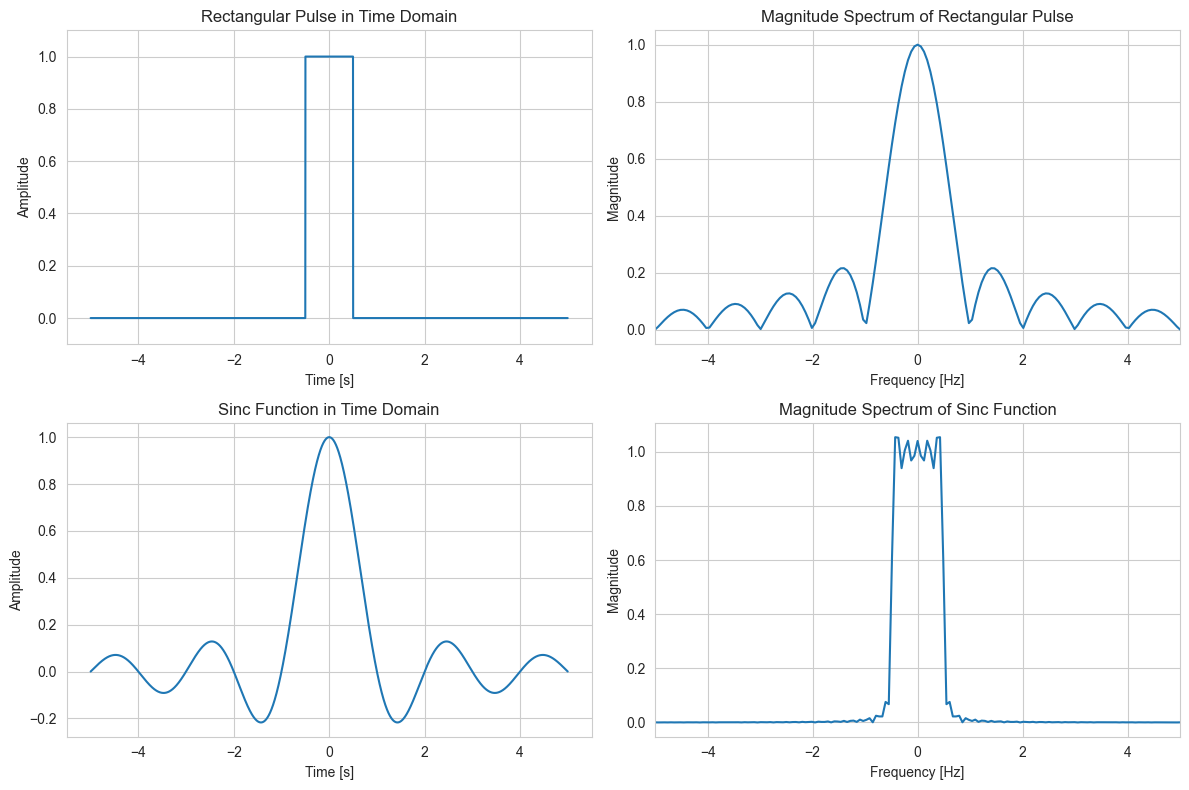

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time-domain rectangular pulse
axs[0, 0].plot(t, pulse)
axs[0, 0].set_title('Rectangular Pulse in Time Domain')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].grid(True)
axs[0, 0].set_ylim([-0.1, 1.1])

# Frequency-domain (sinc)
axs[0, 1].plot(f, pulseFFT_mag)
axs[0, 1].set_title('Magnitude Spectrum of Rectangular Pulse')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)
axs[0, 1].set_xlim([-5, 5])

# Time-domain sinc
axs[1, 0].plot(t, sinc_func)
axs[1, 0].set_title('Sinc Function in Time Domain')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].grid(True)

# Frequency-domain (rectangular-like)
axs[1, 1].plot(f, sincFFT_mag)
axs[1, 1].set_title('Magnitude Spectrum of Sinc Function')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].grid(True)
axs[1, 1].set_xlim([-5, 5])

plt.tight_layout()
plt.show()


## Conclusion

This notebook demonstrated the duality between:

- A **rectangular pulse** in the time domain ↔ **sinc** function in frequency domain.
- A **sinc** function in the time domain ↔ **rectangular** spectrum in frequency domain.

This concept is key in signal processing, particularly in topics such as:
- Ideal filters (which use sinc-based impulse responses),
- Sampling theory (the Whittaker-Shannon interpolation formula),
- Windowing effects (where rectangular windows cause spectral leakage).
